## **Retail Data Analysis Using Machine Learning**


This project uses advanced Machine Learning methods for analysis of Retail based on historical sales data for 45 stores located in different regions - each store contains a number of departments.


## Introduction


Making decisions based on limited history is one of the challenges of modeling retail data. Holidays and major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales – the challenge of this lab is to predict which departments will be affected and to what extent.
Therefore, the main problem I will try to solve in this project is the use of advanced methods of machine learning to:

1. predict the department-wide sales for each store;
2. model the effects of markdowns on holiday weeks;
3. provide recommended actions based on the insights drawn, with prioritization placed on largest business impact.


## DataSet


The statistical data used in this project was obtained from the https://www.kaggle.com/manjeetsingh/retaildataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import LSTM

Let's download retail data that relate to the store, department, and regional activity for the given dates.


In [2]:
df1 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/Features%20data%20set.csv', delimiter=',')
df1.dataframeName = 'Features data set.csv'
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


Let's study this DataSet. As we can see, the DataSet consists of 8 190 rows and 12 columns.

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week


Next, we should download historical sales data which covers the period from 2010-02-05 to 2012-11-01.


In [3]:
df2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/sales%20data-set.csv', delimiter=',')
df2.dataframeName = 'Sales data set.csv'
df2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


As we can see, this DataSet consists of 421 579 rows and 5 columns.

Within this DataSet, we will find the following information:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


The last DataSet contains anonymized information about 45 stores, indicating the type and size of a store.


In [4]:
df3 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/stores%20data-set.csv', delimiter=',')
df3.dataframeName = 'Stores data set.csv'
df3

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## Data pre-preparation


First of all, we need to merge these three DataSets into one using **[pandas.DataFrame.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)**.


In [5]:
df = df1.merge(df3, on = 'Store')
df = df2.merge(df, on = ['Store','Date', 'IsHoliday'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,26/10/2012,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,26/10/2012,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,26/10/2012,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,26/10/2012,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


Let's study this DataSet. As you can see, it consists of 421 570 rows × 16 columns. The DataSet contains information of different types. We should make sure that Python recognized the data types correctly.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


First of all, let's delete rows that contain empty values:


In [7]:
df=df.fillna(0)

As we can see, we should transform the Date columns into the DateTime format. Also the type of Store should be categorical:


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Type'] = df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  category      
 15  Size          421

<ipython-input-8-87dc84d065de>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


**Since stores and their departments belong to different categories, have different sizes, different quantities and assortments of goods and are located in different parts of the city, it will be a mistake to fit the neural network on all records. Departments located in different parts of the city will have different sales with the same input data. In other words, the information for each department has its own variance. Therefore, for the analysis, it is necessary to identify departments and make an analysis for each of them individually.**


Let's group the Rows by Store, Department and Date.


In [9]:
df.groupby(['Store', 'Dept','Date']).sum()

<ipython-input-9-13091dfd7a4f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Store', 'Dept','Date']).sum()


Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
Store Dept Date                                                           
1     1    2010-01-10      20094.19          0        71.89       2.603   
           2010-02-04      57258.43          0        62.27       2.719   
           2010-02-07      16333.14          0        80.91       2.669   
           2010-02-19      41595.55          0        39.93       2.514   
           2010-02-26      19403.54          0        46.63       2.561   
...                             ...        ...          ...         ...   
45    98   2012-10-08        727.49          0        78.65       3.722   
           2012-10-19        760.01          0        56.47       3.969   
           2012-10-26       1076.80          0        58.85       3.882   
           2012-11-05        893.60          0        61.24       3.889   
           2012-12-10       1061.02          0        54.47       4.000   

                       MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Store Dept Date                                                                
1     1    2010-01-10       0.00       0.00       0.00       0.00       0.00   
           2010-02-04       0.00       0.00       0.00       0.00       0.00   
           2010-02-07       0.00       0.00       0.00       0.00       0.00   
           2010-02-19       0.00       0.00       0.00       0.00       0.00   
           2010-02-26       0.00       0.00       0.00       0.00       0.00   
...                          ...        ...        ...        ...        ...   
45    98   2012-10-08   17868.84      50.60      57.66    2593.93    1890.59   
           2012-10-19    2004.02       0.00       3.18     437.73    1537.49   
           2012-10-26    4018.91      58.08     100.00     211.94     858.33   
           2012-11-05   12611.18       0.00      21.36    1667.39    2313.12   
           2012-12-10    1956.28       0.00       7.89     599.32    3990.54   

                              CPI  Unemployment    Size  
Store Dept Date                                          
1     1    2010-01-10  211.671989         7.838  151315  
           2010-02-04  210.820450         7.808  151315  
           2010-02-07  211.223533         7.787  151315  
           2010-02-19  211.289143         8.106  151315  
           2010-02-26  211.319643         8.106  151315  
...                           ...           ...     ...  
45    98   2012-10-08  191.162613         8.684  118221  
           2012-10-19  192.330854         8.667  118221  
           2012-10-26  192.308899         8.667  118221  
           2012-11-05  190.976417         8.567  118221  
           2012-12-10  192.327265         8.667  118221  

[421570 rows x 12 columns]

Let's calculate the number of rows for each department:


In [10]:
df[['Store', 'Dept']].value_counts()

Store  Dept
1      1       143
40     55      143
       59      143
24     49      143
       50      143
              ... 
21     50        1
42     34        1
36     36        1
25     96        1
23     99        1
Length: 3331, dtype: int64

As you can see, most of the departments have 143 rows. Let's analyze one of them.


In [11]:
St = 24
Dt = 50

Let's create a DataSet for a Store: St and for a Department: Dt.


In [12]:
df_d = df[(df['Store']==St) & (df['Dept']==Dt)]
df_d

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
226912,24,50,2010-05-02,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
226985,24,50,2010-12-02,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
227059,24,50,2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
227130,24,50,2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
227201,24,50,2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236783,24,50,2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
236854,24,50,2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
236926,24,50,2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819
236999,24,50,2012-10-19,1151.0,False,52.59,4.153,3446.70,0.00,101.00,111.46,5963.01,138.833613,8.693,A,203819


## Predict the department-wide sales


Let's take the field 'Weekly_Sales' for forecasting. First of all, we should visualize this data.


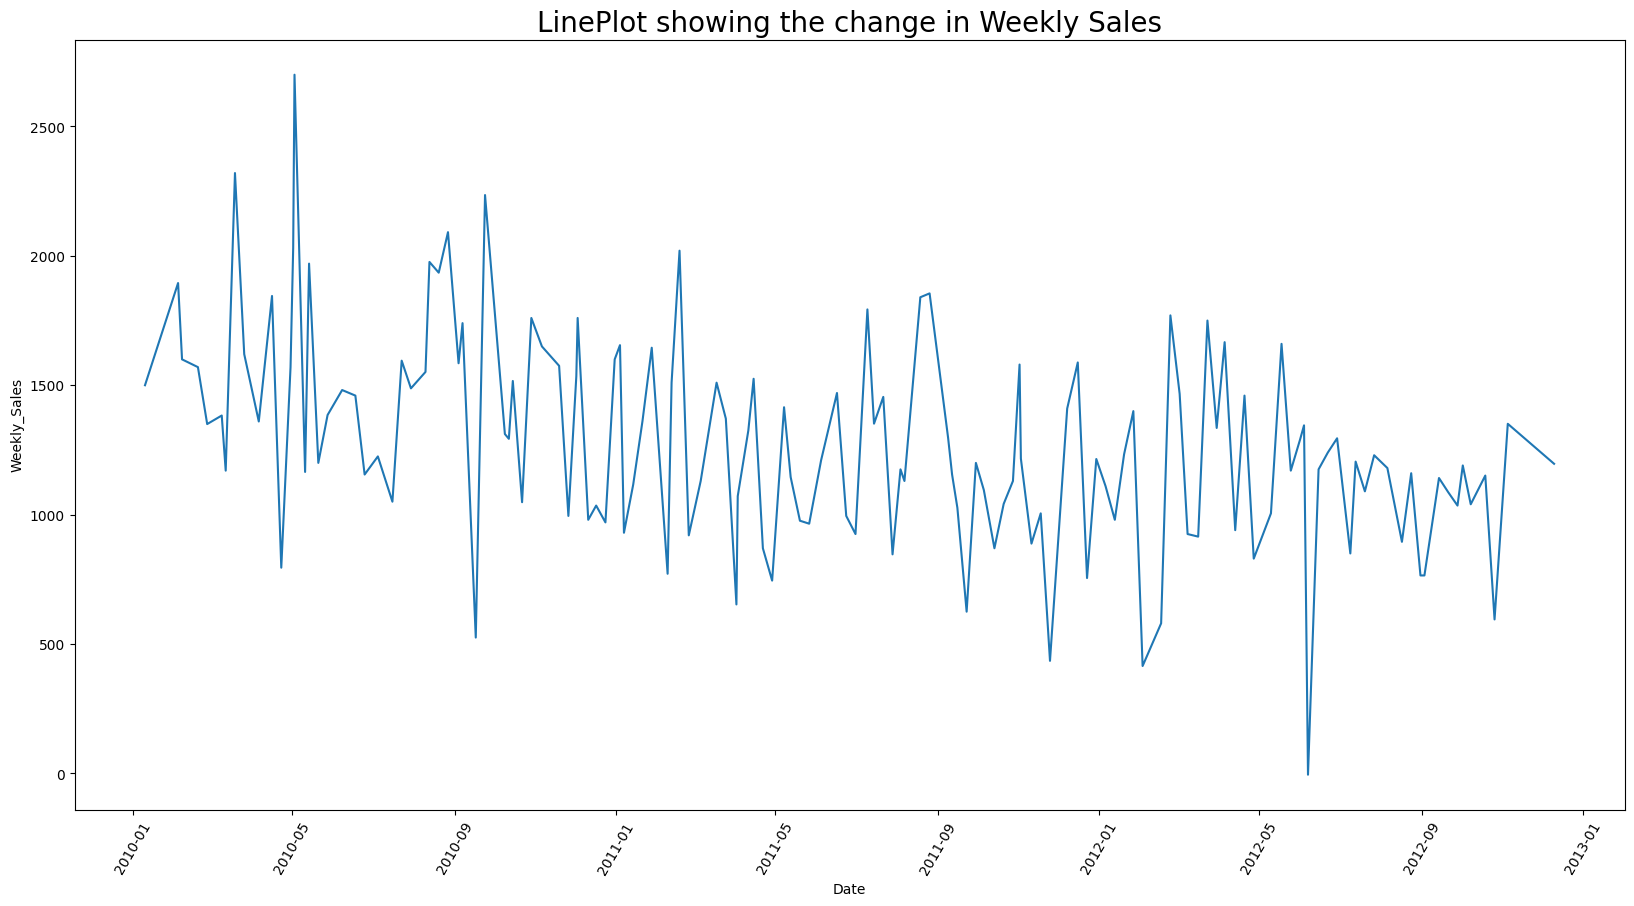

In [13]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', )
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

Let's visualize how sales change during the holidays.


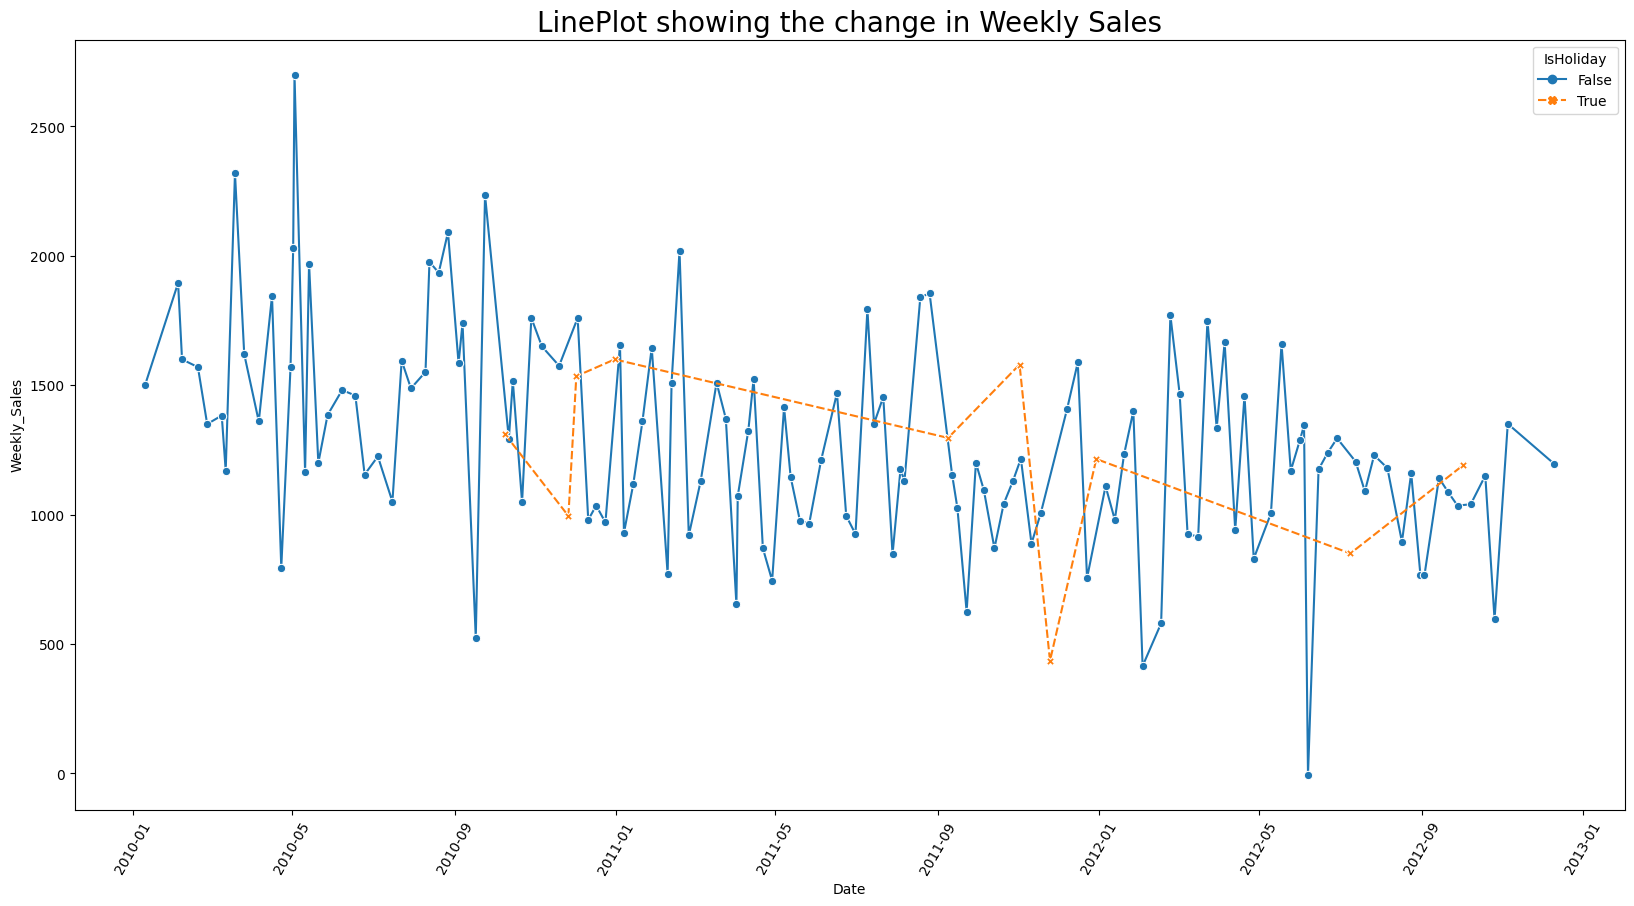

In [15]:
plt.figure
_ = plt.subplots(figsize = (20,10))
_ = plt.xticks(rotation = 60)
_ = sns.lineplot(data = df_d, x = 'Date',y = 'Weekly_Sales', hue = 'IsHoliday',style = 'IsHoliday', markers = True, errorbar=('ci', 68))
_ = plt.title('LinePlot showing the change in Weekly Sales', fontsize=20)
plt.show()

As you can see from the plot, there is no increase in sales on holidays.

For a sales forecast, let's create a separate time series that contains only weekly sales data.


In [16]:
ts = df_d[['Date', 'Weekly_Sales']]
ts = ts.set_index('Date')
ts = ts['Weekly_Sales']
ts

Date
2010-05-02    2030.0
2010-12-02    1535.0
2010-02-19    1570.0
2010-02-26    1350.0
2010-05-03    2700.0
               ...  
2012-09-28    1035.0
2012-05-10    1005.0
2012-12-10    1196.5
2012-10-19    1151.0
2012-10-26     595.0
Name: Weekly_Sales, Length: 143, dtype: float64

If we would like to make a forecast of time series, we can make only an assumption that the data for today depend on the values of previous weeks. In order to check for dependencies, it is necessary to perform a correlation analysis between them. This requires:
1. duplicating the time series of data and moving it vertically down for a certain number of days (lag)
2. deleting the missing data at the beginning and at the end (they are formed by vertical shift (**[pandas.DataFrame.shift()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)**)
3. calculating the correlation coefficient between the obtained series.

Since this operation should be performed for different values of the lag, it is convenient to create a separate function or use **[statsmodels.graphics.tsaplots.plot_acf()](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)**.

Or better we can use [Partial autocorrelation function](https://en.wikipedia.org/wiki/Partial_autocorrelation_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01): **[statsmodels.graphics.tsaplots.plot_pacf()](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)**.

This analysis will allow us to determine the lag delay. That is, how many weeks ago sales affected today's sales.


0     1.000000
1     0.130103
2     0.263880
3     0.136014
4     0.311210
5     0.126184
6     0.245963
7     0.088694
8     0.253053
9     0.071838
10    0.154257
Name: Correlation Coeff, dtype: float64
0     1.000000
1     0.131019
2     0.254831
3     0.086411
4     0.254782
5     0.043069
6     0.131390
7    -0.013168
8     0.127694
9    -0.028223
10    0.000674
Name: Partial Correlation Coeff, dtype: float64


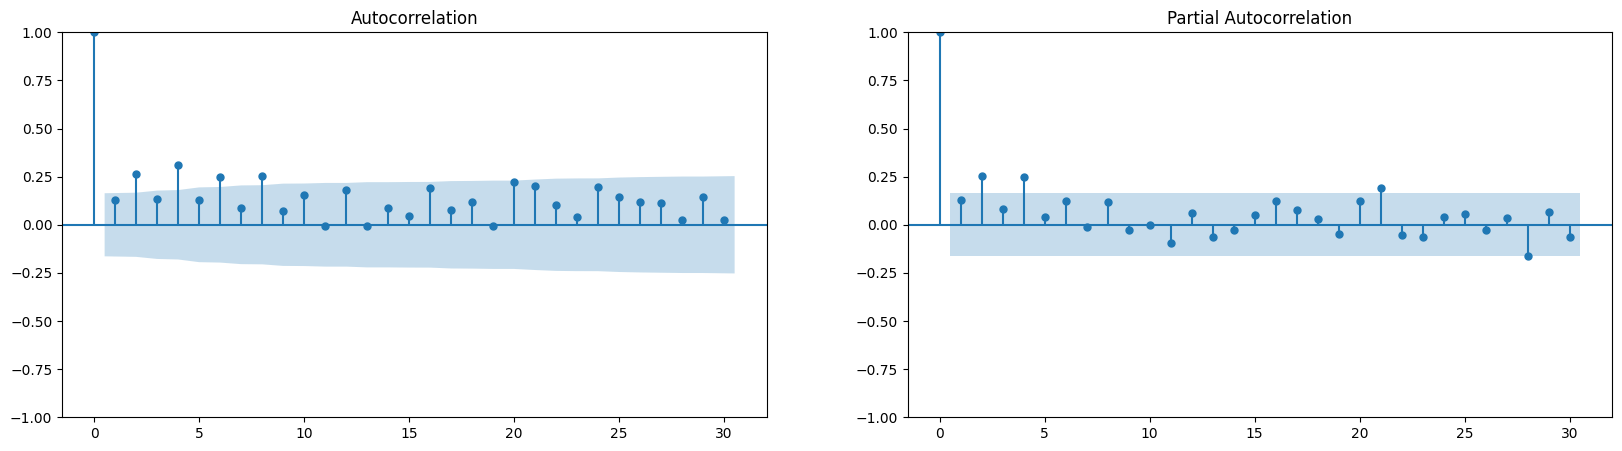

In [18]:
print(pd.Series(acf(ts,nlags=10), name = "Correlation Coeff"))
print(pd.Series(pacf(ts,nlags=10), name = "Partial Correlation Coeff"))


fig, axes = plt.subplots(1,2, figsize=(20,5))
_ = plot_acf(ts, lags=30, ax=axes[0])
_ = plot_pacf(ts, lags=30, ax=axes[1])

As can be seen from the charts, we have to use sales for the previous 4 weeks as input parameters.


### DataSet creation


Any forecast model can be shown as a black-box of input - target. The target should be the data of the original time series, and the input values are given for the previous weeks.


To automate this process, let's create a general function for time series transformation into a dataset structure.


In [19]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):
    """
    Transformation into a training sample taking into account the lag
     : param in_data: Input fields
     : param tar_data: Output field (single)
     : param n_in: Lag shift
     : param dropnan: Do destroy empty lines
     : param target_dep: Whether to take into account the lag of the input field If taken into account, the input will start with lag 1
     : return: Training sample. The last field is the source
    """

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

As mentioned above, the input and output fields are the same when predicting time series, they are only shifted by the lag.
Let's create a dataset:


In [20]:
dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
dataset

,Weekly_Sales(t-0),Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4),Weekly_Sales
Date,,,,,,
2010-05-03,2700.0,1350.0,1570.0,1535.0,2030.0,2700.0
2010-12-03,1760.0,2700.0,1350.0,1570.0,1535.0,1760.0
2010-03-19,2320.0,1760.0,2700.0,1350.0,1570.0,2320.0
2010-03-26,1620.0,2320.0,1760.0,2700.0,1350.0,1620.0
2010-02-04,1895.0,1620.0,2320.0,1760.0,2700.0,1895.0
...,...,...,...,...,...,...
2012-09-28,1035.0,1086.5,1141.5,850.0,765.0,1035.0
2012-05-10,1005.0,1035.0,1086.5,1141.5,850.0,1005.0
2012-12-10,1196.5,1005.0,1035.0,1086.5,1141.5,1196.5


As you can see, the first and last columns contain the same target data.
Now we should create input (**X**) and output (**Y**) Datasets for forecasting models.


In [21]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


### Data normalization


After that, we should normalize all the data. In order to do this, the [**sklearn.preprocessing.MinMaxScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) module should be used.
It allows easy normalize [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01#sklearn.preprocessing.MinMaxScaler.fit_transform) and convert back all data: [**fit_transform()**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01#sklearn.preprocessing.MinMaxScaler.inverse_transform)


In [22]:
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that we will form a training and a test DataSet using [**sklearn.model_selection.train_test_split()**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) in the ratio of 70/30. Without shuffling. It means that test samples are located at the end of **X** and **Y** DataSets.

As a result we will have:

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

All the data is normalized. However, for comparing results we should have real scale data of the training and test DataSets:


In [24]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


### Linear Regression


First of all, we should create a model. We will test three types of models. Linear regression, Multilayer Neural Network with Backpropagation and Long Short-Term Memory Neural Network.
Let's create a [**LinearRegression()**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01):


In [25]:
regressor = LinearRegression()

After that, the model should be fitted on the training DataSet. In order to do this, we will use the function fit().


In [26]:
regressor.fit(x_train, y_train)

LinearRegression()

Then we can test it on the test DataSet and use it for prognostication.


In [27]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

Let's analyze the accuracy of the results using **[sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)**.


In [28]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.12826507500598938
Correlation test -0.09385443205786403
Mean Absolute Error: 1218.9282051415503
Mean Squared Error: 1496069.2012173075
Root Mean Squared Error: 1223.139076809055


As you can see, the result correlation on the test DataSet is very bad. Therefore, we should use another nonlinear model.


### Back Propagation Neural Network


The modern approach to the establishment of complex functional dependencies is the use of neural networks. A classical neural network is a [**multilayer neural network with back propagation**](https://en.wikipedia.org/wiki/Backpropagation?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).

We will use [**keras**](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) framework to build this model.
First of all, we should create a Neural Network model as a separate function.

A neural network is a sequence of layers. The function [**Sequential()**](https://keras.io/guides/sequential_model/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) is used to create a network.

Let's create a network that consists of 2 hidden layers. Each of which consists of 100 neurons. [**keras.layers.Dense()**](https://keras.io/api/layers/core_layers/dense/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).

To avoid retraining problems, we will use additional layers [**keras.layers.Dropout()**](https://keras.io/api/layers/regularization_layers/dropout/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).

The output layer will consist of one neuron, since we have only one value at the output.

Model should be compiled for fitting and predicting: [**keras.Model.compile()**](https://keras.io/api/models/model_training_apis/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).


In [29]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

Once the model function is built, it is necessary to create a neural network directly and specify the learning parameters: [**keras.wrappers.scikit_learn.KerasRegressor()**](https://keras.io/zh/scikit-learn-api/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01). Also we should specify the number of fitting [**epoch and batch size**](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).


In [30]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)

<ipython-input-30-b47cf3ec054a>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=1)


Now, let’s train our model for **1000** epochs.
It should be noted, that fitting process is very slow. To avoid overfitting and decrease the time of fitting, we will use **[EarlyStopping()](https://keras.io/api/callbacks/early_stopping/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01)** function, that will control the value of the loss function. This function will stop the fitting process when the loss function stop decreasing during 10 iteration. After that, there will be a rollback of all weight parameters to their state that was 10 iteration before.


In [31]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1,  restore_best_weights=True)
history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es]) # Fitting model

Epoch 1/1000
11/11 [==============================] - 1s 22ms/step - loss: 0.2296 - val_loss: 0.1179
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.1226 - val_loss: 0.0310
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0380 - val_loss: 0.0316
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0266 - val_loss: 0.0182
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0250 - val_loss: 0.0170
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0189
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0232 - val_loss: 0.0181
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.0175
Epoch 9/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.0177
Epoch 10/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.018

Let's show [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).


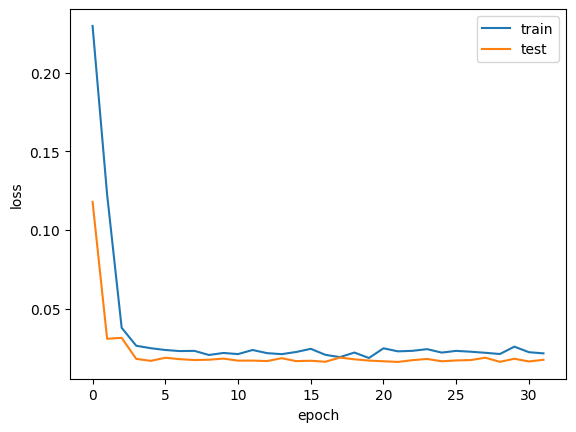

In [32]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see, Neural Network is fitting well and no overfitting is observed.
Let's calculate prediction of the training (**res_train_ANN**) and test (**res_test_ANN**) sets.


Let's calculate the forecast and make inverse normalization to real scale.


In [33]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

5/5 [==============================] - 0s 2ms/step


Let's compare the accuracy of Linear Regression and Neural Network.


In [34]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train 0.35389072974769603
Correlation train 0.10977246856830841
Mean Absolute Error: 1140.8731351892875
Mean Squared Error: 1309294.8143953807
Root Mean Squared Error: 1144.2442109949172


You can see, that the results we got for Neural Network are a little better than ones for Linear Regression. Let's try to use recurrent neural network.


### Long Short-Term Memory - LSTM


Unlike standard feedforward neural networks, an [**LSTM**](https://en.wikipedia.org/wiki/Long_short-term_memory?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) has feedback connections. It can not only process single data points, but also entire sequences of data (such as speech, video or time series).

In the case of a time series, the neural network has one input and one output. However, the vector of time series values for the previous moments of time is fed to the input.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0BOFEN/RNN.png" width="1000" alt="cognitiveclass.ai logo">
</center>


To do this, we should transform the input DataSets into 3D shape.


In [35]:
train_x_LSTM = x_train.reshape((x_train.shape[0], 1, 4))
test_x_LSTM = x_test.reshape((x_test.shape[0], 1, 4))

Let's create an LSTM Neural Network that consists of one [**LSTM**](https://keras.io/api/layers/recurrent_layers/lstm/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01) layer and one BP layer like in the previous case.
As you can see, in this case our NN will consist of 100 LSTM and 100 BP neurons.


In [36]:
batch_size=int(y_train.shape[0]*.1)
model = Sequential()
model.add(LSTM(100, input_shape=(train_x_LSTM.shape[1], train_x_LSTM.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1])) #activation='sigmoid'
model.compile(loss='mean_squared_error', optimizer='adam')

All subsequent steps of learning and predicting are similar to the previous neural network.


In [37]:
history = model.fit(train_x_LSTM, y_train, epochs=epochs, batch_size=batch_size, validation_data=(test_x_LSTM, y_test), verbose=1, shuffle=False, callbacks=[es])

Epoch 1/1000
11/11 [==============================] - 4s 54ms/step - loss: 0.2225 - val_loss: 0.0945
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.1021 - val_loss: 0.0259
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0347 - val_loss: 0.0268
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.0212
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 0.0170
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0244 - val_loss: 0.0174
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0228 - val_loss: 0.0184
Epoch 8/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0255 - val_loss: 0.0179
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0229 - val_loss: 0.0171
Epoch 10/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0241 - val_loss: 0.017

Let's plot the dynamic of loss and val loss like in the previous case.


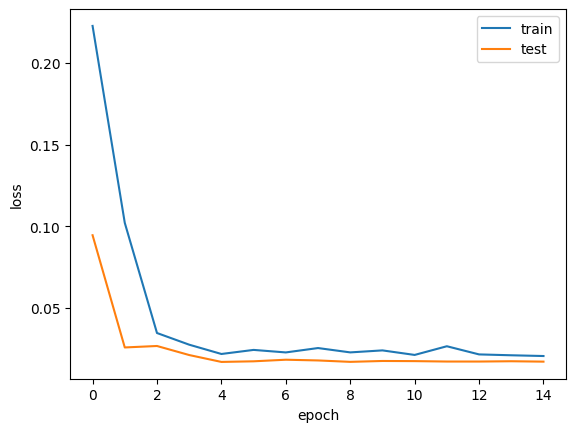

In [38]:

plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

Let's calculate our forecast.


In [39]:
##YOUR CODE GOES HERE##
res_tr_LSTM = model.predict(train_x_LSTM)
res_ts_LSTM = model.predict(test_x_LSTM)
res_train_LSTM=scaler_y.inverse_transform(res_tr_LSTM).flatten()
res_test_LSTM=scaler_y.inverse_transform(res_ts_LSTM).flatten()

2/2 [==============================] - 0s 7ms/step


And accuracy:


In [40]:

print("Correlation train", np.corrcoef(res_train, res_train_LSTM)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_LSTM)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_LSTM))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_LSTM))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_LSTM)))

Correlation train 0.313530333282305
Correlation train -0.006298489442310697
Mean Absolute Error: 1128.4727954269179
Mean Squared Error: 1280134.471058874
Root Mean Squared Error: 1131.4302767112404


As you can see, the forecast results of the test data set are the same like in the previous models. Let's visualize these 3 results:


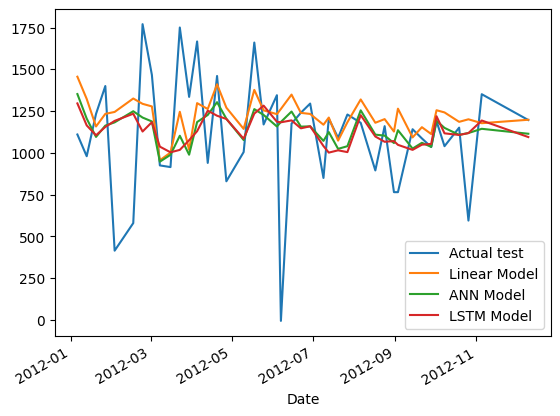

In [41]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')
res_pred_test_LSTM = pd.Series(res_test_LSTM, name = 'Predicted test LSTM')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN,  'LSTM Model': res_pred_test_LSTM,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()
plt.show()

As you can see, all forecasting shows similar results.

None of the models can predict large peaks. However, the positions of the peaks coincide for all the models. That is, this approach allows you to make adequate models. The accuracy of the forecast depends on additional factors which we will try to consider in the next section.


## Model the effects of markdowns on holiday weeks


To take into account the impact of markdowns on sales on holidays, we should first build a model of sales forecasting depending on other input parameters.


Let's set Date as the index field in our DataSet.


In [42]:
df_d = df_d.set_index('Date')
df_d

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-05-02,24,50,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326,A,203819
2010-12-02,24,50,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326,A,203819
2010-02-19,24,50,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326,A,203819
2010-02-26,24,50,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326,A,203819
2010-05-03,24,50,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,24,50,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,A,203819
2012-05-10,24,50,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,A,203819
2012-12-10,24,50,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,A,203819


Next, we should leave only those fields that affect weekly sales and remove the others. In particular, fields such as 'Store', 'Dept', 'Type' are for information only. Field 'Size' remains a constant for a specific department, and therefore cannot be used for modeling, even if it affects the sales.


In [43]:
df_d.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [44]:
df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment']]
df_d

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Date,,,,,,,,,,,
2010-05-02,2030.0,False,22.43,2.954,0.00,0.00,0.00,0.00,0.00,131.527903,8.326
2010-12-02,1535.0,True,25.94,2.940,0.00,0.00,0.00,0.00,0.00,131.586613,8.326
2010-02-19,1570.0,False,31.05,2.909,0.00,0.00,0.00,0.00,0.00,131.637000,8.326
2010-02-26,1350.0,False,33.98,2.910,0.00,0.00,0.00,0.00,0.00,131.686000,8.326
2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953
2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693
2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693


Let's use the function my_headmap to investigate the correlation between these fields:

> Indented block




In [45]:
def my_headmap(corr):
    '''
    Input:
    corr: correlation matrix in DataFrame
    '''
    # Generate a mask for the upper triangle because it contains duplicate information
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmin=-1., vmax=1., annot=True, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

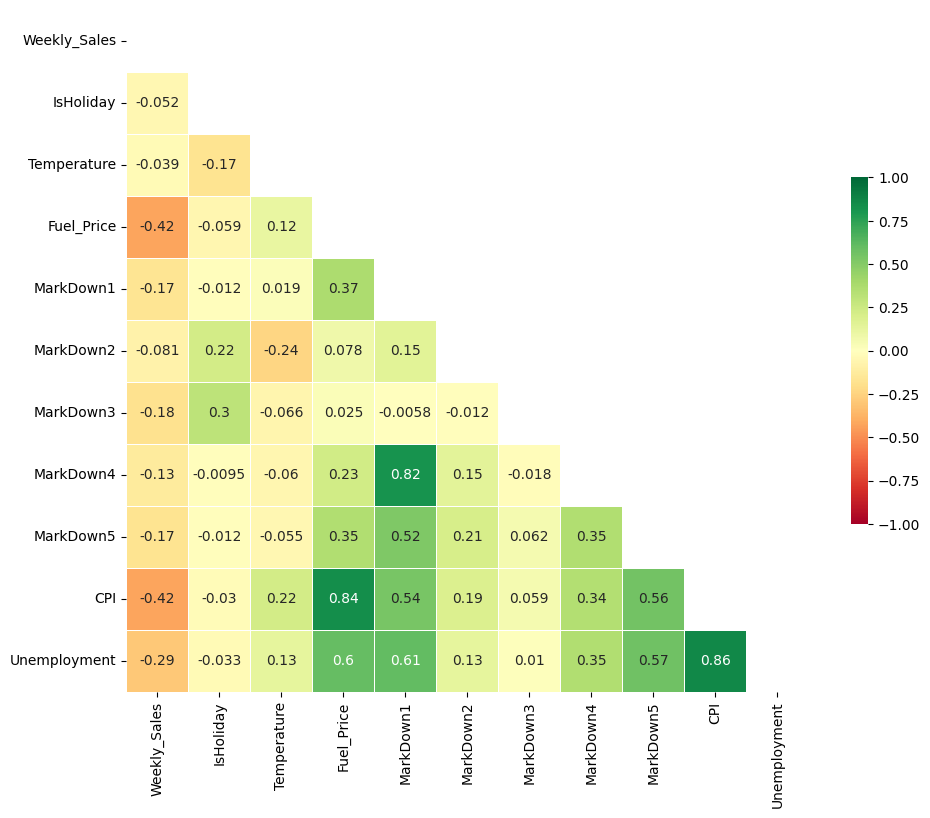

In [46]:
my_headmap(df_d.corr())

As you can see there are no fields that lineary impact on Weekly Sales.


Let's create our DataSet. To do this, join our historical 4 weeks sales data to this dataset.


In [47]:
df_hp = df_d.join(dataset[dataset.columns[1:-1]])
df_hp = df_hp.dropna()
df_hp

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales(t-1),Weekly_Sales(t-2),Weekly_Sales(t-3),Weekly_Sales(t-4)
Date,,,,,,,,,,,,,,,
2010-05-03,2700.0,False,36.73,2.919,0.00,0.00,0.00,0.00,0.00,131.735000,8.326,1350.0,1570.0,1535.0,2030.0
2010-12-03,1760.0,False,42.31,2.938,0.00,0.00,0.00,0.00,0.00,131.784000,8.326,2700.0,1350.0,1570.0,1535.0
2010-03-19,2320.0,False,46.09,2.960,0.00,0.00,0.00,0.00,0.00,131.824290,8.326,1760.0,2700.0,1350.0,1570.0
2010-03-26,1620.0,False,48.87,2.963,0.00,0.00,0.00,0.00,0.00,131.863129,8.326,2320.0,1760.0,2700.0,1350.0
2010-02-04,1895.0,False,45.22,2.957,0.00,0.00,0.00,0.00,0.00,131.901968,8.211,1620.0,2320.0,1760.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1035.0,False,58.86,4.158,11941.13,15.28,21.76,984.11,7013.13,138.739500,8.953,1086.5,1141.5,850.0,765.0
2012-05-10,1005.0,False,60.35,4.151,10349.00,0.00,16.05,5824.86,2770.76,138.825600,8.693,1035.0,1086.5,1141.5,850.0
2012-12-10,1196.5,False,51.64,4.186,5138.51,0.00,141.88,407.81,3284.69,138.911700,8.693,1005.0,1035.0,1086.5,1141.5


Let's create the input and target fields:


In [48]:
col = df_hp.columns
X, Y = df_hp[col[1:]], df_hp[col[0]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Weekly_Sales(t-1)', 'Weekly_Sales(t-2)', 'Weekly_Sales(t-3)',
       'Weekly_Sales(t-4)'],
      dtype='object')
Target: Weekly_Sales


Normalize them:


In [68]:

scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

And split them into training and test sets:


In [70]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

We make inverse transform to get the training and test sets in real scale.


In [72]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

### Linear model


Let's create a Linear model for comparing the results:


In [73]:
regressor = LinearRegression()

In [74]:
regressor.fit(x_train, y_train)

LinearRegression()

In [75]:
y_pred_test_ln = regressor.predict(x_test)
y_pred_test_ln = scaler_y.inverse_transform(y_pred_test_ln).flatten()

In [76]:
print("Correlation train", regressor.score(x_train, y_train))
print("Correlation test", regressor.score(x_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test_ln))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test_ln))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ln)))

Correlation train 0.26288332778616996
Correlation test -1.447132031447754
Mean Absolute Error: 1334.5018593626776
Mean Squared Error: 1883506.5582750465
Root Mean Squared Error: 1372.4090346085043


As you can see, the results are very bad too.


### Back propagation Neural Network


Let's use the same Neural Network as in the previous task.


In [77]:
def BP_model(X):
    """
    Multilayer neural network with back propagation .
    :param X: Input DataSet
    :return: keras NN model
    """
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [78]:
epochs = 1000
batch_size=int(y_train.shape[0]*.1)
estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)

<ipython-input-78-5f84aae4abe8>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)


We will use the same EarlyStopping function.


In [79]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)
history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es])

Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


Let's show [**loss and validation loss dynamics**](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0BOFEN347-2022-01-01).


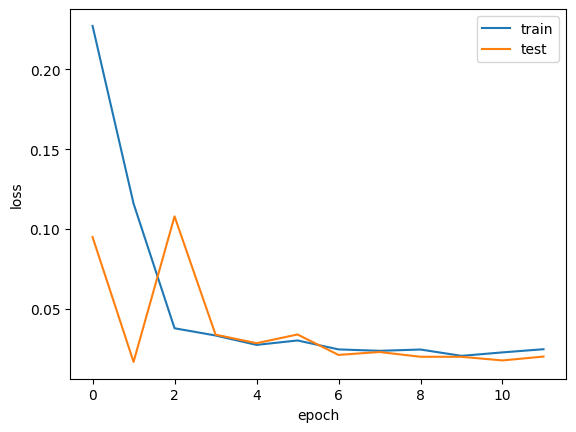

In [81]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

As you can see, the Neural Network is fitting well and no overfitting is observed.
Let's calculate the prediction of training (**res_train_ANN**) an test (**res_test_ANN**) sets.


Let's calculate a forecast and make inverse normalization to real scale.


In [82]:
res_tr=estimator.predict(x_train)
res_ts=estimator.predict(x_test)
res_train_ANN=scaler_y.inverse_transform(res_tr.reshape(-1, 1)).flatten()
res_test_ANN=scaler_y.inverse_transform(res_ts.reshape(-1, 1)).flatten()

Let's compare the accuracy of Linear Regression and Neural Network.


In [83]:
print("Correlation train", np.corrcoef(res_train, res_train_ANN)[0,1])
print("Correlation train", np.corrcoef(res_test, res_test_ANN)[0,1])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, res_test_ANN))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, res_test_ANN))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, res_test_ANN)))

Correlation train -0.1349089407228189
Correlation train 0.008125214918133339
Mean Absolute Error: 1121.9471519419847
Mean Squared Error: 1265288.69133377
Root Mean Squared Error: 1124.850519550829


As you can see, the forecast results of the test data set are much better than ones of the previous models. Let's visualize these 2 results:


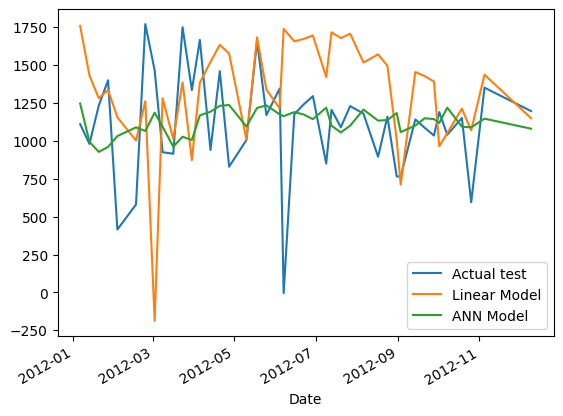

In [84]:
res_pred_test_ln = pd.Series(y_pred_test_ln, name = 'Predicted test Linear Model')
res_pred_test_ANN = pd.Series(res_test_ANN, name = 'Predicted test ANN')

df_2 = pd.DataFrame({'Actual test': res_test, 'Linear Model': res_pred_test_ln, 'ANN Model': res_pred_test_ANN})
df_2.index = df_d.index[len(df_d)-len(res_test):]
df_2.plot()
plt.show()

As you can see from the plot, an ANN shows better results.

Let's calculate the sensitivity of week sales for other factors.


### Sensitivity analysis


We can modify the function, adding regressor model as an input parameter. It will allow us to use this function for any types of regressors.


In [88]:
def my_sens(regressor, x, c, p):
    '''
    Input:
    x: DataFrame of input Linear Regression
    y: Series of output Linear Regression
    p: Percentage of price change
    Return:
    Sensitivity of target
    '''
    X = x[-1:].copy()
    y_pred = regressor.predict(X)
    X[0][c] = X[0][c]*(1+p)
    y_pred_delta = regressor.predict(X)
    return ((y_pred_delta - y_pred) / y_pred)

Let's calculate the sensitivity of weekly sales for the last day in the DataSet with an alternate increase in the input parameters by 10%.


In [89]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales on %s: %5.2f%%" % (c, my_sens(estimator, x_test, i+1,  0.1) * 100))

Sensitivity of Week Sales on Temperature:  0.87%
Sensitivity of Week Sales on Fuel_Price:  1.44%
Sensitivity of Week Sales on MarkDown1:  0.13%
Sensitivity of Week Sales on MarkDown2:  0.00%
Sensitivity of Week Sales on MarkDown3:  0.00%
Sensitivity of Week Sales on MarkDown4:  0.01%
Sensitivity of Week Sales on MarkDown5:  0.16%
Sensitivity of Week Sales on CPI:  1.27%
Sensitivity of Week Sales on Unemployment:  0.94%
Sensitivity of Week Sales on Weekly_Sales(t-1):  0.71%
Sensitivity of Week Sales on Weekly_Sales(t-2):  0.92%
Sensitivity of Week Sales on Weekly_Sales(t-3):  0.56%
Sensitivity of Week Sales on Weekly_Sales(t-4):  0.63%


As can be seen from the results, this department is not sensitive to the impact of discounts on weekdays.


Let's analyze the impact of markdowns during the holiday week. To do this, we will create an input matrix that contains only information about the holidays.


In [90]:
x_test2 = [list(x) for x in x_test if x[0]>=0.99]
x_test2 = np.array(x_test2)

In [91]:
for i,c in enumerate(df_hp.columns[2:]):
    print("Sensitivity of Week Sales in Holiday on %s: %5.2f%%" % (c, my_sens(estimator, x_test2, i+1,  0.1) * 100))

Sensitivity of Week Sales in Holiday on Temperature:  1.09%
Sensitivity of Week Sales in Holiday on Fuel_Price:  1.20%
Sensitivity of Week Sales in Holiday on MarkDown1:  0.17%
Sensitivity of Week Sales in Holiday on MarkDown2:  0.00%
Sensitivity of Week Sales in Holiday on MarkDown3:  0.00%
Sensitivity of Week Sales in Holiday on MarkDown4:  0.02%
Sensitivity of Week Sales in Holiday on MarkDown5:  0.20%
Sensitivity of Week Sales in Holiday on CPI:  1.11%
Sensitivity of Week Sales in Holiday on Unemployment:  1.17%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-1):  0.41%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-2):  0.86%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-3):  0.44%
Sensitivity of Week Sales in Holiday on Weekly_Sales(t-4):  0.52%


As you can see, the holiday week is not sensitive for markdowns too.


## Recommendation for department


As can be seen from the sensitivity analysis for this department, the most significant is the MarkDown5. The other types of discounts either do not affect or, conversely, can have the opposite effect (MarkDown1).

A very interesting is that the sales of this department are very sensitive to temperature. Along with the temperature increase, sales increase sharply both in the holiday and regular weeks. Therefore, the weather forecast should be taken into account in this case.

It can also be seen that the sales intensity of this department have 2 weeks cycle, which is probably related to the type of goods. This means that sales increase will stimulate future sales.


1. Create a function that will analyze the sensitivity of weekly sales in holiday days for any department.
2. Apply this function for one department on your choice.
3. Calculate the sensitivity for any 10 departments, that have 143 rows in the DataSet.


In [ ]:
def sens_holiday(df, St, Dt):
    # DataSet creation
    df_d = df[(df['Store']==St) & (df['Dept']==Dt)]

    # Week Sales Time Series creation
    ts = df_d[['Date', 'Weekly_Sales']]
    ts = ts.set_index('Date') ts = ts['Weekly_Sales']

    # Week Sales DataSet creation
    ts_dataset = series_to_supervised(pd.DataFrame(ts), ts, 4)
    df_d = df_d.set_index('Date')
    df_d = df_d[['Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']]
    df_hp = df_d.join(ts_dataset[ts_dataset.columns[1:-1]])
    df_hp = df_hp.dropna()

    # Splitting on Input and Target
    col = df_hp.columns
    X, Y = df_hp[col[1:]], df_hp[col[0]]

    # Normalization
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaler_y = MinMaxScaler(feature_range=(0, 1))
    scaled_x = scaler_x.fit_transform(X)
    scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

    # Creation Train and Test DataSets
    x_train, x_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.3, shuffle=False)

    # Real scale target
    res_train = scaler_y.inverse_transform(y_train).flatten()
    res_test = scaler_y.inverse_transform(y_test).flatten()

    # ANN Creation and fitting
    epochs = 1000
    batch_size=int(y_train.shape[0]*.1)
    estimator = KerasRegressor(build_fn=BP_model, X=x_train, epochs=epochs, batch_size=batch_size, verbose=0)
    es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, verbose=1, restore_best_weights=True)
    history=estimator.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[es])

    # Creation Holidays DataSet
    x_test2 = [list(x) for x in x_test if x[0]>=0.99] x_test2 = np.array(x_test2)

    # Sensitivity calculation
    res = {}
    res['Store'] = [St]
    res['Department'] = [Dt]
    for i,c in enumerate(df_hp.columns[2:]):
       res[c] = ["{:.2f}%".format(my_sens(estimator, x_test2, i+1, 0.1)*100)]
    res = pd.DataFrame(res)
    res = res.set_index(['Store', 'Department'])
    return res

### Sensitivity of Department


In [ ]:
sens_holiday(df, 1, 1)

###Sensitivity of 10 departments


In [ ]:
# filter departments with 143 rows
depts = df[['Store', 'Dept']].value_counts() depts = depts[depts == 143] depts.name = 'rows' depts

In [ ]:
# shuffle depts
depts = depts.reset_index() shuffled_dt = depts.reindex(np.random.permutation(depts.index)) shuffled_dt

In [ ]:
# sensitivity calculation
sens = pd.DataFrame() for v in shuffled_dt.values[:10]: print('Store:', v[0], 'Department:', v[1]) sens = sens.append(sens_holiday(df, v[0], v[1]))

In [ ]:
sens

## Conclusions


During this project, we demonstrated how to analyze and forecast store sales.

It was shown how to use autocorrelation analysis to find time lag delays. We studied how to transform a DataSet to take into account time delays in data.
It was shown how to use linear models, backpropagation neural networks and recurrent neural networks to predict time series on the example of week sales of the store department.

It was shown how to build combined DataSets containing both lag delays and store activity data.
On the basis of a neural network, the influence of markdowns in the store on sales both during the holiday and regular weeks was analyzed.  A sales strategy for a specific department was proposed.

